In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [75]:
# from the course notebooks

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# y_pred = w0 + X_train.dot(w)
# w0, w = train_linear_regression(X_train, y_train)


In [101]:
def train_and_compute_rmse(df, impute_mode, np_seed, use_reg, reg_val, combine_train_val):
    
    print(f"Setting numpy seed to {np_seed}")
    np.random.seed(np_seed)
    
    shuffled_idx = np.arange(len(df))
    np.random.shuffle(shuffled_idx)
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = housing_subset.iloc[shuffled_idx[:n_train]]
    df_val = housing_subset.iloc[shuffled_idx[n_train:n_train + n_val]]
    df_test = housing_subset.iloc[shuffled_idx[n_train + n_val:]]
    
    if impute_mode == "zeroes":
        
        impute_val = 0
    
    elif impute_mode == "train_mean":
        
        impute_val = df_train.total_bedrooms.mean()
        
    else:
        
        raise ValueError("Bad impute_mode")

    df_train = df_train.fillna(impute_val)
    df_val = df_val.fillna(impute_val)
    df_test = df_test.fillna(impute_val)
    
    if not combine_train_val:
    
        X_train = df_train.drop(columns=["median_house_value"]).values
        X_val = df_val.drop(columns=["median_house_value"]).values
        X_test = df_test.drop(columns=["median_house_value"]).values

        y_train = df_train.median_house_value
        y_val = df_val.median_house_value
        y_test = df_test.median_house_value
        
    else:
        
        print("Combining train and val")
        
        df_train = pd.concat([df_train, df_val])
        
        X_train = df_train.drop(columns=["median_house_value"]).values
        X_test = df_test.drop(columns=["median_house_value"]).values

        y_train = df_train.median_house_value
        y_test = df_test.median_house_value
    
    if use_reg:
        
        w0, w = train_linear_regression_reg(X_train, y_train, reg_val)
        
    else:
        
        w0, w = train_linear_regression(X_train, y_train)
        
    if not combine_train_val:
        
        y_pred = w0 + X_val.dot(w)
        rmse_val = rmse(y_val, y_pred)

    else:
        
        print("Using test set for RMSE")
        
        y_pred = w0 + X_test.dot(w)
        rmse_val = rmse(y_test, y_pred)

    return rmse_val
        
        
    
    
    

In [77]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 13:30:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-25 13:30:16 (20.2 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [78]:
!ls

housing.csv  ml_zoomcamp_hw_1_20230918.ipynb  ml_zoomcamp_hw_2_20230924.ipynb


In [79]:
!mkdir -p ../data/
!mv housing.csv ../data/

In [80]:
housing = pd.read_csv("../data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [82]:
housing_subset =\
    housing[housing.ocean_proximity.isin(['<1H OCEAN','INLAND'])][[
        'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value'
]]

In [83]:
housing_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [84]:
housing_subset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


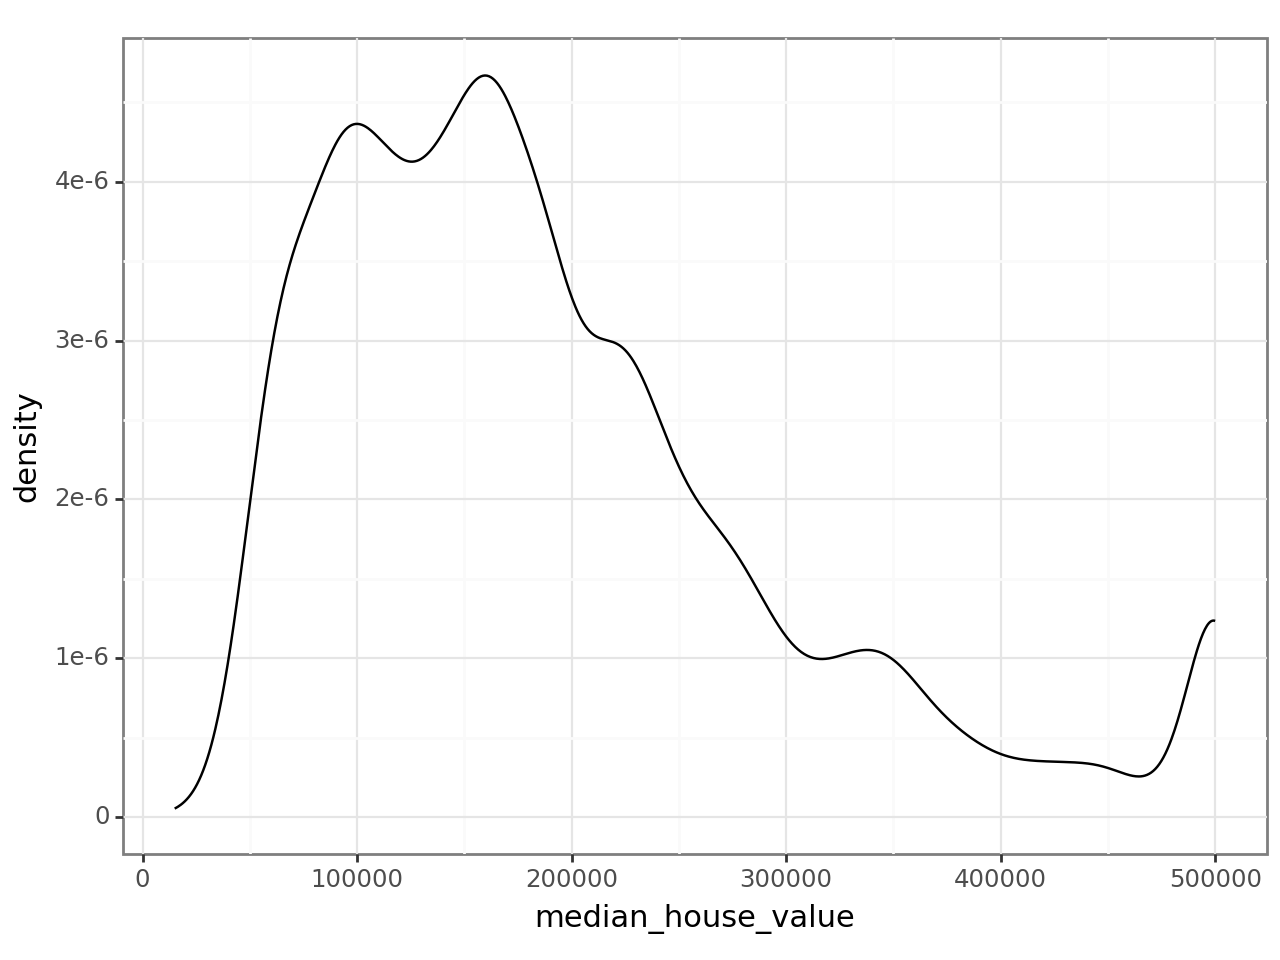

<Figure Size: (640 x 480)>

In [85]:
p9.ggplot(housing_subset, p9.aes(x="median_house_value")) +\
    p9.geom_density() +\
    p9.theme_bw()

# Q1

In [86]:
housing_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


calling `.info()` shows that `total_bedrooms` is the only column with missing values.

# Q2

In [87]:
housing_subset.population.median()

1195.0

`population` median is 1195.0

# Log the housing median 

In [88]:
housing_subset.median_house_value = np.log1p(housing_subset.median_house_value)

# Q3

In [89]:
round(train_and_compute_rmse(housing_subset, "zeroes", 42, False, 0, False), 2)

Setting numpy seed to 42


0.34

In [90]:
round(train_and_compute_rmse(housing_subset, "train_mean", 42, False, 0, False), 2)

Setting numpy seed to 42


0.34

They are the same (at this level of rounding!)

# Q4

In [91]:
reg_vals_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

rmse_vals = [round(train_and_compute_rmse(housing_subset, "zeroes", 42, True, i, False), 2) for i in reg_vals_list]

Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42
Setting numpy seed to 42


In [92]:
rmse_vals

[0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.35]

In [93]:
round(np.std(rmse_vals), 3)

0.004

In [94]:
np.std(rmse_vals)

0.00415739709641547

In [95]:
housing_subset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196


# Q5

In [96]:
seed_vals_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_vals_seeds = [train_and_compute_rmse(housing_subset, "zeroes", int(i), False, 0, False) for i in seed_vals_list]
rmse_vals_seeds

Setting numpy seed to 0
Setting numpy seed to 1
Setting numpy seed to 2
Setting numpy seed to 3
Setting numpy seed to 4
Setting numpy seed to 5
Setting numpy seed to 6
Setting numpy seed to 7
Setting numpy seed to 8
Setting numpy seed to 9


[0.33773871601241534,
 0.33779993536620034,
 0.3384287006770243,
 0.3320049468307805,
 0.33944518625569475,
 0.3433819705265852,
 0.3385330211770784,
 0.34687476973049747,
 0.35127368659561153,
 0.3341558266517612]

In [97]:
round(np.std(rmse_vals_seeds),3)

0.005

# Q6

In [102]:
train_and_compute_rmse(housing_subset, "zeroes", 9, True, 0.001, True)

Setting numpy seed to 9
Combining train and val
Using test set for RMSE


0.3349899336608946